# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [2]:
# Load and check the dataset
import pandas as pd

# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv(r'C:\Users\ASUS\Desktop\Assignment_A2\A2_Analysing_Data\BTS_short_100.csv', encoding="UTF-8")

# Display the first five rows of the DataFrame
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [3]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [4]:
# Remove duplicate rows
df = df.drop_duplicates()

# Display the first five rows of the DataFrame
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [5]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

# H0 (answer in words):
Levels of masculinity in male characters do not have a statistically significant effect on fanfiction success, when controlling for publication year and lexical richness.

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


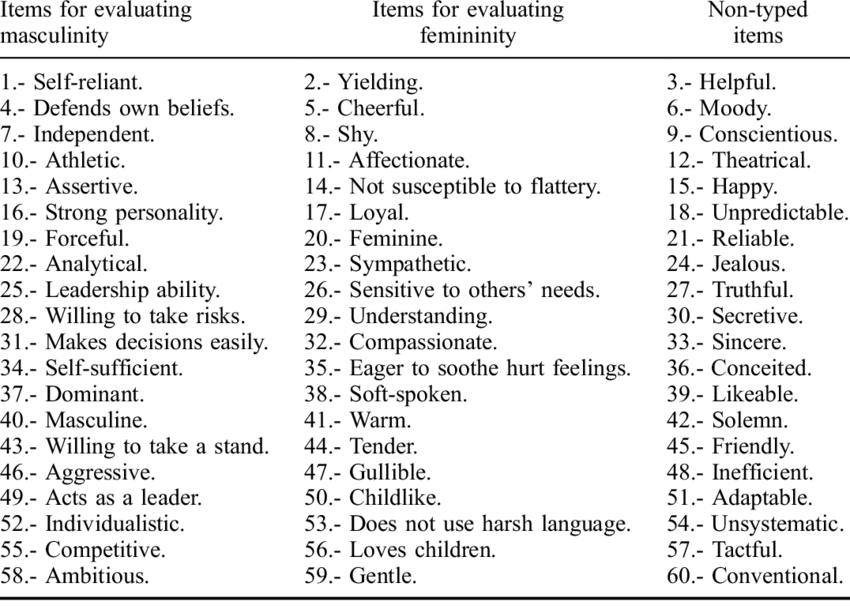

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [6]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab
! git clone https://github.com/maartensap/riveter-nlp.git

fatal: destination path 'riveter-nlp' already exists and is not an empty directory.


In [7]:
%ls

 驱动器 C 中的卷是 OS
 卷的序列号是 32F9-FE49

 C:\Users\ASUS\Desktop\Assignment_A2\A2_Analysing_Data 的目录

2024/03/15  11:06    <DIR>          .
2024/03/07  12:14    <DIR>          ..
2024/03/12  15:26    <DIR>          .ipynb_checkpoints
2024/03/07  12:14    <DIR>          __MACOSX
2024/03/15  11:06         3,177,175 AD_Assignment_2.ipynb
2024/03/07  12:14           650,673 BTS_short_100.csv
2024/03/12  19:57    <DIR>          riveter-nlp
               2 个文件      3,827,848 字节
               5 个目录 20,107,878,400 可用字节


In [8]:
%cd C:\Users\ASUS\Desktop\Assignment_A2\A2_Analysing_Data\riveter-nlp\riveter

C:\Users\ASUS\Desktop\Assignment_A2\A2_Analysing_Data\riveter-nlp\riveter


In [9]:
# Install some spaCy models and Python packages to support Riveter
!pip install -U spacy-experimental

In [10]:
# This will downlaod ~500Mb of data
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

     ---------------------------------------- 0.0/490.3 MB ? eta -:--:--
     ---------------------------------------- 0.2/490.3 MB 4.8 MB/s eta 0:01:43
     ---------------------------------------- 0.3/490.3 MB 4.1 MB/s eta 0:02:01
     ---------------------------------------- 0.6/490.3 MB 4.5 MB/s eta 0:01:48
     ---------------------------------------- 1.0/490.3 MB 4.6 MB/s eta 0:01:46
     ---------------------------------------- 1.4/490.3 MB 5.8 MB/s eta 0:01:25
     ---------------------------------------- 2.2/490.3 MB 7.0 MB/s eta 0:01:11
     ---------------------------------------- 3.0/490.3 MB 8.4 MB/s eta 0:00:58
     ---------------------------------------- 3.7/490.3 MB 9.1 MB/s eta 0:00:54
     --------------------------------------- 4.7/490.3 MB 10.3 MB/s eta 0:00:48
     ---------------------------------------- 5.1/490.3 MB 9.9 MB/s eta 0:00:50
     ---------------------------------------- 5.1/490.3 MB 9.3 MB/s eta 0:00:52
      -------------------------------------- 6.

In [11]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB 6.3 MB/s eta 0:00:02
     -- ------------------------------------- 0.8/12.8 MB 8.0 MB/s eta 0:00:02
     --- ------------------------------------ 1.2/12.8 MB 9.2 MB/s eta 0:00:02
     ----- ---------------------------------- 1.7/12.8 MB 10.0 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.8 MB 10.4 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 10.3 MB/s eta 0:00:01
     ---------- ----------------------------- 3.5/12.8 MB 11.1 MB/s eta 0:00:01
     ------------ --------------------------- 4.1/12.8 MB 10.8 MB/s eta 0:00:01
     -------------- ------------------------- 4.6/12.8 MB 11.0 MB/s eta 0:00:01
     ---------------- ----------------------- 5.1/12.8 MB 11.3 MB/s eta 0:00:01
     ------------------ --------------------- 5.8/12.8 MB 11.6 MB/s eta 0:00:01
     ------------------- -------------------- 6.3/1

In [12]:
!pip install seaborn

Now we have prepared all the dependencies needed.

In [13]:
# Import necessary libraries
from collections import defaultdict # Used to provide a default value for a key that does not exist
import os # Used to provide a way of using operating system dependent functionality
import pandas as pd #Used for data analysis and manipulation
import random # Used to implement pseudo-random number generators for various distributions
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns # Used for data visualization
import matplotlib.pyplot as plt # Used to create figures and plots

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [14]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    # Initialize an empty list to hold the segments of text
    segments = []
    current_segment = []
    
    # Iterate over each word in the input text
    for word in text.split():
        # Check if adding the next word will exceed the max_length constraint
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    # Add the last segment if there are any words left in it       
    if current_segment:
        segments.append(' '.join(current_segment))
    # Return the list of text segments
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [15]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
# Initialize Riveter instance
riveter = Riveter()

# Load the lexicon
riveter.load_sap_lexicon('power')

# Create an empty dictionary to store scores for each text segment
scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [33]:
# Import tqdm for progress bar functionality
from tqdm import tqdm # used to display a progress bar when executing code

# Iterate over each row in the DataFrame 
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    # Extract the 'story_id' and the 'story_content' from the current row
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    riveter.train(segments,
             text_ids,
             num_bootstraps=20,
             persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'}) 

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:21<31:23, 21.16s/it]

2024-03-15 15:01:04 Complete!
Story ID: 4706144, Masculine Power Score: 0.07191089037028969



Processing stories:   2%|▏         | 2/90 [00:34<24:36, 16.77s/it]

2024-03-15 15:01:18 Complete!
Story ID: 4752980, Masculine Power Score: 0.29597047352762335



Processing stories:   3%|▎         | 3/90 [00:48<22:02, 15.20s/it]

2024-03-15 15:01:31 Complete!
Story ID: 4621698, Masculine Power Score: 0.6374603174603175



Processing stories:   4%|▍         | 4/90 [01:06<23:38, 16.50s/it]

2024-03-15 15:01:50 Complete!
Story ID: 3651108, Masculine Power Score: 0.12721006327144435



Processing stories:   6%|▌         | 5/90 [01:24<24:08, 17.05s/it]

2024-03-15 15:02:08 Complete!
Story ID: 5282729, Masculine Power Score: 0.2176269184817572



Processing stories:   7%|▋         | 6/90 [01:44<25:16, 18.05s/it]

2024-03-15 15:02:28 Complete!
Story ID: 5533886, Masculine Power Score: -0.014794973544973545



Processing stories:   8%|▊         | 7/90 [02:03<25:24, 18.37s/it]

2024-03-15 15:02:47 Complete!
Story ID: 4547622, Masculine Power Score: 0.05011890190592762



Processing stories:   9%|▉         | 8/90 [02:18<23:44, 17.37s/it]

2024-03-15 15:03:02 Complete!
Story ID: 16177508, Masculine Power Score: 0.20083992859961253



Processing stories:  10%|█         | 9/90 [02:35<22:57, 17.00s/it]

2024-03-15 15:03:18 Complete!
Story ID: 15745185, Masculine Power Score: -0.1060657717080576



Processing stories:  11%|█         | 10/90 [02:50<22:10, 16.63s/it]

2024-03-15 15:03:34 Complete!
Story ID: 15654528, Masculine Power Score: 0.25146573403683964



Processing stories:  12%|█▏        | 11/90 [03:05<21:00, 15.96s/it]

2024-03-15 15:03:49 Complete!
Story ID: 7448155, Masculine Power Score: 0.3176698792587911



Processing stories:  13%|█▎        | 12/90 [03:22<21:17, 16.38s/it]

2024-03-15 15:04:06 Complete!
Story ID: 4983847, Masculine Power Score: 0.09704949163357737



Processing stories:  14%|█▍        | 13/90 [03:42<22:11, 17.29s/it]

2024-03-15 15:04:25 Complete!
Story ID: 3313118, Masculine Power Score: -0.2192965367965368



Processing stories:  16%|█▌        | 14/90 [04:04<23:54, 18.88s/it]

2024-03-15 15:04:48 Complete!
Story ID: 3290390, Masculine Power Score: -0.10488971886514073



Processing stories:  17%|█▋        | 15/90 [04:24<23:50, 19.07s/it]

2024-03-15 15:05:07 Complete!
Story ID: 36435301, Masculine Power Score: 0.06090615715228718



Processing stories:  18%|█▊        | 16/90 [04:41<22:45, 18.45s/it]

2024-03-15 15:05:24 Complete!
Story ID: 36575491, Masculine Power Score: 0.2597786810091724



Processing stories:  19%|█▉        | 17/90 [04:58<22:07, 18.18s/it]

2024-03-15 15:05:42 Complete!
Story ID: 35225224, Masculine Power Score: 0.2452129662088102



Processing stories:  20%|██        | 18/90 [05:15<21:23, 17.83s/it]

2024-03-15 15:05:59 Complete!
Story ID: 4594527, Masculine Power Score: 0.1912019924519925



Processing stories:  21%|██        | 19/90 [05:30<20:05, 16.98s/it]

2024-03-15 15:06:14 Complete!
Story ID: 5485625, Masculine Power Score: 0.10537496985772847



Processing stories:  22%|██▏       | 20/90 [05:46<19:31, 16.74s/it]

2024-03-15 15:06:30 Complete!
Story ID: 36408319, Masculine Power Score: 0.07667652102392203



Processing stories:  23%|██▎       | 21/90 [06:09<21:06, 18.36s/it]

2024-03-15 15:06:52 Complete!
Story ID: 35762659, Masculine Power Score: 0.19549032338930744



Processing stories:  24%|██▍       | 22/90 [06:27<20:43, 18.29s/it]

2024-03-15 15:07:10 Complete!
Story ID: 35603194, Masculine Power Score: 0.3655031407920891



Processing stories:  26%|██▌       | 23/90 [06:47<20:57, 18.77s/it]

2024-03-15 15:07:30 Complete!
Story ID: 35344306, Masculine Power Score: 0.11593572665838736



Processing stories:  27%|██▋       | 24/90 [07:02<19:34, 17.80s/it]

2024-03-15 15:07:46 Complete!
Story ID: 36695155, Masculine Power Score: 0.07277777777777777



Processing stories:  28%|██▊       | 25/90 [07:20<19:24, 17.92s/it]

2024-03-15 15:08:04 Complete!
Story ID: 36064474, Masculine Power Score: 0.11156425675033073



Processing stories:  29%|██▉       | 26/90 [07:38<19:11, 17.99s/it]

2024-03-15 15:08:22 Complete!
Story ID: 36024820, Masculine Power Score: 0.140103752719031



Processing stories:  30%|███       | 27/90 [07:59<19:48, 18.87s/it]

2024-03-15 15:08:43 Complete!
Story ID: 35182330, Masculine Power Score: 0.034393152257603254



Processing stories:  31%|███       | 28/90 [08:19<19:39, 19.03s/it]

2024-03-15 15:09:03 Complete!
Story ID: 36567496, Masculine Power Score: 0.2075361329521287



Processing stories:  32%|███▏      | 29/90 [08:38<19:32, 19.23s/it]

2024-03-15 15:09:22 Complete!
Story ID: 35560330, Masculine Power Score: 0.12822615869748663



Processing stories:  33%|███▎      | 30/90 [09:01<20:08, 20.14s/it]

2024-03-15 15:09:45 Complete!
Story ID: 35877496, Masculine Power Score: 0.12889721509630542



Processing stories:  34%|███▍      | 31/90 [09:20<19:32, 19.88s/it]

2024-03-15 15:10:04 Complete!
Story ID: 35957410, Masculine Power Score: 0.28216729662142337



Processing stories:  36%|███▌      | 32/90 [09:37<18:24, 19.04s/it]

2024-03-15 15:10:21 Complete!
Story ID: 30947654, Masculine Power Score: 0.019605824907095327



Processing stories:  37%|███▋      | 33/90 [09:56<17:56, 18.88s/it]

2024-03-15 15:10:39 Complete!
Story ID: 36332707, Masculine Power Score: -0.11358955356207356



Processing stories:  38%|███▊      | 34/90 [10:14<17:31, 18.77s/it]

2024-03-15 15:10:58 Complete!
Story ID: 35967940, Masculine Power Score: 0.17656522481012998



Processing stories:  39%|███▉      | 35/90 [10:32<16:55, 18.47s/it]

2024-03-15 15:11:16 Complete!
Story ID: 35001073, Masculine Power Score: 0.17750111000110996



Processing stories:  40%|████      | 36/90 [10:49<16:22, 18.20s/it]

2024-03-15 15:11:33 Complete!
Story ID: 35138911, Masculine Power Score: 0.1383251332749426



Processing stories:  41%|████      | 37/90 [11:06<15:30, 17.55s/it]

2024-03-15 15:11:49 Complete!
Story ID: 35280397, Masculine Power Score: 0.2833060207336523



Processing stories:  42%|████▏     | 38/90 [11:24<15:32, 17.93s/it]

2024-03-15 15:12:08 Complete!
Story ID: 36049939, Masculine Power Score: 0.3264625969352911



Processing stories:  43%|████▎     | 39/90 [11:43<15:21, 18.06s/it]

2024-03-15 15:12:26 Complete!
Story ID: 34995673, Masculine Power Score: 0.16440998063413442



Processing stories:  44%|████▍     | 40/90 [12:03<15:42, 18.85s/it]

2024-03-15 15:12:47 Complete!
Story ID: 33477346, Masculine Power Score: 0.4328729603729604



Processing stories:  46%|████▌     | 41/90 [12:21<15:09, 18.57s/it]

2024-03-15 15:13:05 Complete!
Story ID: 36840832, Masculine Power Score: -0.21334273913221283



Processing stories:  47%|████▋     | 42/90 [12:37<14:14, 17.80s/it]

2024-03-15 15:13:21 Complete!
Story ID: 30896276, Masculine Power Score: 0.01879699248120301



Processing stories:  48%|████▊     | 43/90 [12:53<13:21, 17.06s/it]

2024-03-15 15:13:36 Complete!
Story ID: 37363471, Masculine Power Score: 0.41439963545226693



Processing stories:  49%|████▉     | 44/90 [13:09<12:50, 16.74s/it]

2024-03-15 15:13:52 Complete!
Story ID: 36984901, Masculine Power Score: 0.17117577935992256



Processing stories:  50%|█████     | 45/90 [13:25<12:33, 16.75s/it]

2024-03-15 15:14:09 Complete!
Story ID: 33353644, Masculine Power Score: 0.042386669471852594



Processing stories:  51%|█████     | 46/90 [13:43<12:25, 16.95s/it]

2024-03-15 15:14:27 Complete!
Story ID: 37002835, Masculine Power Score: -0.13342674868990662



Processing stories:  52%|█████▏    | 47/90 [14:00<12:08, 16.95s/it]

2024-03-15 15:14:44 Complete!
Story ID: 5630824, Masculine Power Score: 0.3017543859649122



Processing stories:  53%|█████▎    | 48/90 [14:16<11:42, 16.74s/it]

2024-03-15 15:15:00 Complete!
Story ID: 10053617, Masculine Power Score: 0.22191194524477326



Processing stories:  54%|█████▍    | 49/90 [14:34<11:45, 17.21s/it]

2024-03-15 15:15:18 Complete!
Story ID: 1572659, Masculine Power Score: 0.2437558275058275



Processing stories:  56%|█████▌    | 50/90 [14:53<11:46, 17.65s/it]

2024-03-15 15:15:37 Complete!
Story ID: 7450573, Masculine Power Score: 0.3120709012349879



Processing stories:  57%|█████▋    | 51/90 [15:11<11:28, 17.65s/it]

2024-03-15 15:15:54 Complete!
Story ID: 6918676, Masculine Power Score: 0.0669611977464735



Processing stories:  58%|█████▊    | 52/90 [15:31<11:37, 18.36s/it]

2024-03-15 15:16:14 Complete!
Story ID: 6075402, Masculine Power Score: 0.36416410175666514



Processing stories:  59%|█████▉    | 53/90 [15:48<11:11, 18.15s/it]

2024-03-15 15:16:32 Complete!
Story ID: 11101779, Masculine Power Score: 0.30189560439560437



Processing stories:  60%|██████    | 54/90 [16:06<10:53, 18.14s/it]

2024-03-15 15:16:50 Complete!
Story ID: 11321331, Masculine Power Score: 0.05229499175193821



Processing stories:  61%|██████    | 55/90 [16:25<10:41, 18.32s/it]

2024-03-15 15:17:09 Complete!
Story ID: 12284853, Masculine Power Score: 0.07072651550400909



Processing stories:  62%|██████▏   | 56/90 [16:45<10:36, 18.72s/it]

2024-03-15 15:17:29 Complete!
Story ID: 12282003, Masculine Power Score: 0.12211991555364812



Processing stories:  63%|██████▎   | 57/90 [17:02<10:02, 18.26s/it]

2024-03-15 15:17:46 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [17:19<09:34, 17.94s/it]

2024-03-15 15:18:03 Complete!
Story ID: 4228053, Masculine Power Score: 0.21684769984345809



Processing stories:  66%|██████▌   | 59/90 [17:40<09:41, 18.75s/it]

2024-03-15 15:18:24 Complete!
Story ID: 12127317, Masculine Power Score: 0.1505276200888921



Processing stories:  67%|██████▋   | 60/90 [17:56<09:02, 18.07s/it]

2024-03-15 15:18:40 Complete!
Story ID: 12010134, Masculine Power Score: 0.31111317004438555



Processing stories:  68%|██████▊   | 61/90 [18:15<08:51, 18.33s/it]

2024-03-15 15:18:59 Complete!
Story ID: 11510919, Masculine Power Score: 0.47646476330686854



Processing stories:  69%|██████▉   | 62/90 [18:35<08:45, 18.77s/it]

2024-03-15 15:19:19 Complete!
Story ID: 8145802, Masculine Power Score: 0.18632424167378955



Processing stories:  70%|███████   | 63/90 [18:53<08:22, 18.60s/it]

2024-03-15 15:19:37 Complete!
Story ID: 6637942, Masculine Power Score: -0.15877267998160366



Processing stories:  71%|███████   | 64/90 [19:10<07:47, 17.97s/it]

2024-03-15 15:19:54 Complete!
Story ID: 7427905, Masculine Power Score: -0.023580786669021962



Processing stories:  72%|███████▏  | 65/90 [19:26<07:16, 17.45s/it]

2024-03-15 15:20:10 Complete!
Story ID: 3893857, Masculine Power Score: 0.1452989871278217



Processing stories:  73%|███████▎  | 66/90 [19:42<06:50, 17.12s/it]

2024-03-15 15:20:26 Complete!
Story ID: 33040258, Masculine Power Score: 0.22874779541446205



Processing stories:  74%|███████▍  | 67/90 [20:00<06:38, 17.33s/it]

2024-03-15 15:20:44 Complete!
Story ID: 33858850, Masculine Power Score: -0.1602826626779698



Processing stories:  76%|███████▌  | 68/90 [20:22<06:49, 18.63s/it]

2024-03-15 15:21:06 Complete!
Story ID: 2775776, Masculine Power Score: 0.24466672216672217



Processing stories:  77%|███████▋  | 69/90 [20:43<06:50, 19.53s/it]

2024-03-15 15:21:27 Complete!
Story ID: 3197963, Masculine Power Score: 0.30047008547008547



Processing stories:  78%|███████▊  | 70/90 [21:00<06:12, 18.64s/it]

2024-03-15 15:21:44 Complete!
Story ID: 12395199, Masculine Power Score: 0.15310148093601278



Processing stories:  79%|███████▉  | 71/90 [21:19<05:53, 18.62s/it]

2024-03-15 15:22:02 Complete!
Story ID: 10934010, Masculine Power Score: 0.23207468457468455



Processing stories:  80%|████████  | 72/90 [21:34<05:20, 17.78s/it]

2024-03-15 15:22:18 Complete!
Story ID: 12301116, Masculine Power Score: -0.012129461584996976



Processing stories:  81%|████████  | 73/90 [21:53<05:03, 17.87s/it]

2024-03-15 15:22:36 Complete!
Story ID: 12706317, Masculine Power Score: -0.09658228276807344



Processing stories:  82%|████████▏ | 74/90 [22:11<04:51, 18.20s/it]

2024-03-15 15:22:55 Complete!
Story ID: 11499468, Masculine Power Score: 0.006145595841045247



Processing stories:  83%|████████▎ | 75/90 [22:29<04:30, 18.00s/it]

2024-03-15 15:23:13 Complete!
Story ID: 12184146, Masculine Power Score: 0.33599162556929957



Processing stories:  84%|████████▍ | 76/90 [22:48<04:18, 18.45s/it]

2024-03-15 15:23:32 Complete!
Story ID: 12201333, Masculine Power Score: 0.10804291305381568



Processing stories:  86%|████████▌ | 77/90 [23:16<04:33, 21.04s/it]

2024-03-15 15:23:59 Complete!
Story ID: 11496030, Masculine Power Score: 0.08031670448036612



Processing stories:  87%|████████▋ | 78/90 [23:41<04:27, 22.30s/it]

2024-03-15 15:24:25 Complete!
Story ID: 11510277, Masculine Power Score: 0.17689750682766742



Processing stories:  88%|████████▊ | 79/90 [24:05<04:12, 22.99s/it]

2024-03-15 15:24:49 Complete!
Story ID: 10772274, Masculine Power Score: 0.4544607800206316



Processing stories:  89%|████████▉ | 80/90 [24:27<03:46, 22.66s/it]

2024-03-15 15:25:11 Complete!
Story ID: 12646050, Masculine Power Score: 0.041052576910895304



Processing stories:  90%|█████████ | 81/90 [24:47<03:15, 21.75s/it]

2024-03-15 15:25:31 Complete!
Story ID: 11161479, Masculine Power Score: -0.05708102539261319



Processing stories:  91%|█████████ | 82/90 [25:04<02:43, 20.49s/it]

2024-03-15 15:25:48 Complete!
Story ID: 12069936, Masculine Power Score: 0.046197056347432285



Processing stories:  92%|█████████▏| 83/90 [25:23<02:19, 19.95s/it]

2024-03-15 15:26:07 Complete!
Story ID: 12285972, Masculine Power Score: 0.4238882090276742



Processing stories:  93%|█████████▎| 84/90 [25:43<01:59, 19.87s/it]

2024-03-15 15:26:27 Complete!
Story ID: 12372702, Masculine Power Score: -0.03510704953874046



Processing stories:  94%|█████████▍| 85/90 [26:01<01:36, 19.35s/it]

2024-03-15 15:26:45 Complete!
Story ID: 12610496, Masculine Power Score: 0.07604726816893205



Processing stories:  96%|█████████▌| 86/90 [26:22<01:18, 19.70s/it]

2024-03-15 15:27:05 Complete!
Story ID: 10970472, Masculine Power Score: 0.11156655844155845



Processing stories:  97%|█████████▋| 87/90 [26:41<00:59, 19.68s/it]

2024-03-15 15:27:25 Complete!
Story ID: 12084552, Masculine Power Score: 0.3721278329099966



Processing stories:  98%|█████████▊| 88/90 [27:04<00:41, 20.57s/it]

2024-03-15 15:27:48 Complete!
Story ID: 12727119, Masculine Power Score: -0.029462030211203007



Processing stories:  99%|█████████▉| 89/90 [27:22<00:19, 19.74s/it]

2024-03-15 15:28:05 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [27:42<00:00, 18.47s/it]

2024-03-15 15:28:26 Complete!
Story ID: 10859508, Masculine Power Score: 0.31606224729975485


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [35]:
# Q2 (code)
# Display the first 5 rows of the DataFrame
print(df.head())

   story_id  published_year  words  kudos  comments  \
0   4706144            2015   1185  249.0       1.0   
1   4752980            2015   1164   79.0       0.0   
3   4621698            2015   1016  105.0       4.0   
5   3651108            2015   1174  339.0       6.0   
7   5282729            2015   1173   17.0       0.0   

                                       story_content  lexical_richness  \
0  library snacks & 3AM promises\n\nAuthor's Note...          0.428571   
1  Worry\n\nYou stumbled through the apartment do...          0.400665   
3  Mornings\n\nThis is literally trash omg what I...          0.428986   
5  Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...          0.412295   
7  Unspoken Words\n\nYou come back into the flat,...          0.376110   

   masculine_power_score  
0               0.071911  
1               0.295970  
3               0.637460  
5               0.127210  
7               0.217627  


In [ ]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [36]:
!pip install lexicalrichness # Used for text analysis

ERROR: Invalid requirement: '#'


In [37]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,lexical_richness,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.428571,0.071911
1,4752980,2015,1164,79.0,0.0,Worry\n\nYou stumbled through the apartment do...,0.400665,0.295970
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.428986,0.637460
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.412295,0.127210
7,5282729,2015,1173,17.0,0.0,"Unspoken Words\n\nYou come back into the flat,...",0.376110,0.217627


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


array([[<Axes: title={'center': 'story_id'}>,
        <Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'kudos'}>,
        <Axes: title={'center': 'comments'}>,
        <Axes: title={'center': 'lexical_richness'}>],
       [<Axes: title={'center': 'masculine_power_score'}>, <Axes: >,
        <Axes: >]], dtype=object)

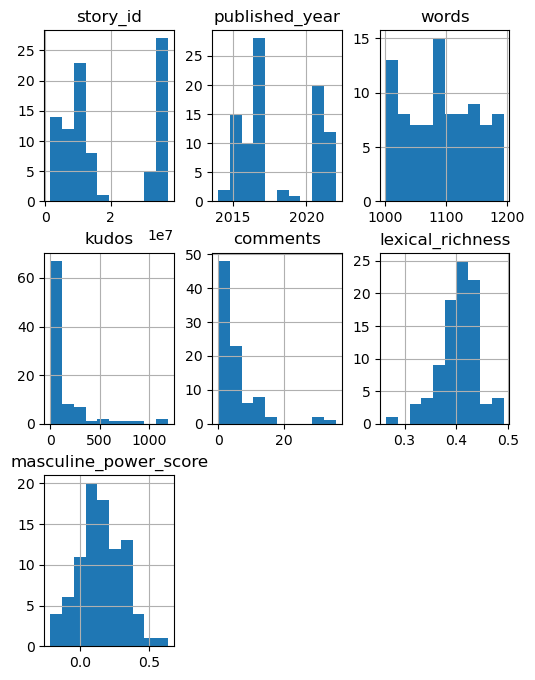

In [38]:
# Q3a (code): Check data distribution
df.hist(figsize=(6,8))

In [39]:
# Q3b (code): compute some descriptive statistics
print(df.describe())

           story_id  published_year        words        kudos   comments  \
count  9.000000e+01       90.000000    90.000000    90.000000  90.000000   
mean   1.839576e+07     2018.088889  1094.344444   133.888889   5.000000   
std    1.307922e+07        2.612177    55.327048   229.121598   6.709041   
min    1.572659e+06     2014.000000  1002.000000     0.000000   0.000000   
25%    7.448760e+06     2016.000000  1042.250000    19.250000   0.000000   
50%    1.224167e+07     2017.000000  1095.000000    53.000000   3.000000   
75%    3.517148e+07     2021.000000  1141.750000   121.000000   6.750000   
max    3.736347e+07     2022.000000  1194.000000  1190.000000  36.000000   

       lexical_richness  masculine_power_score  
count         90.000000              90.000000  
mean           0.405027               0.145873  
std            0.037109               0.164698  
min            0.264443              -0.219297  
25%            0.384458               0.043339  
50%            0.4101

In [40]:
# Q3c (code): Check for any missing values
print(df.isnull().sum())

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
lexical_richness         0
masculine_power_score    0
dtype: int64


In [41]:
# Q3d (code): replace all the NA values with 
df.fillna(0, inplace=True)

# Check the missing value again to confirm the replacement is successful
print(df.isnull().sum())

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
lexical_richness         0
masculine_power_score    0
dtype: int64


It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

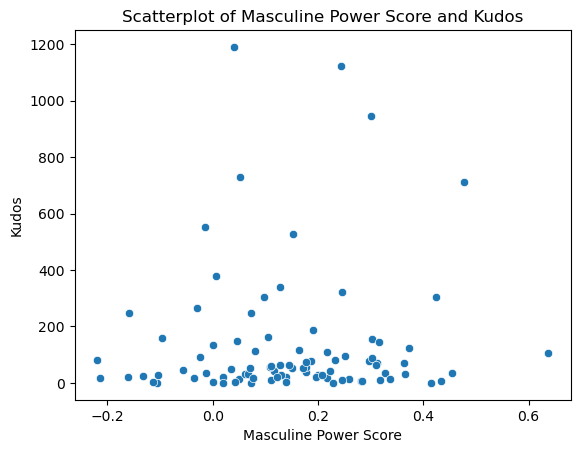

In [42]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
sns.scatterplot(x='masculine_power_score', y='kudos', data=df)

plt.title('Scatterplot of Masculine Power Score and Kudos')
plt.xlabel('Masculine Power Score')
plt.ylabel('Kudos')

# Show the scatterplot
plt.show()

**Q5. Multiple Regression and Analysis**

In [43]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary
import statsmodels.api as sm # Used for statistical model and test

# Delete NaN value in the DataFrame
df.dropna(inplace=True)

# Select dependent and independent variables
X = df[['masculine_power_score', 'published_year', 'words']] 
y = df['kudos'] 

# Add a constant
X = sm.add_constant(X)

# Create a model
model = sm.OLS(y, X)

# Fit a model
result = model.fit()

# Print the summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     5.570
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00153
Time:                        16:23:30   Log-Likelihood:                -608.29
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.013e+

**Q6. Interpret the results of the regression analysis**

# Q6a (words): Interpret the R-squared and Adj. R-squared
An R-squared value of 0.163 means that the model explains 16.3% of the variability in the dependent variable (kudos).The value is relatively low, meaning that the model has limited explanatory power. There may be other variables not included in the model that explain the kudos variation.

An Adjusted R-squared value of 0.133 means that the proportion of variability explained by the model slightly decreases. Since the Adjusted R-squared penalizes the model for including insignificant predictors, the value is typically lower than the R-squared value.

# Q6b (words): Interpret F-test result
The F-statistic is 5.570, indicating stronger evidence against the null hypothesis.The p-value is 0.00153,below 0.05, suggesting that the model is statistically significant. Given the two numbers,it can be assumend that the regression model overall significantly predicts the dependent variable (kudos).

# Q6c (words): Interpret coefficients and t-test result
The regression analysis shows that only the "published_year" variable has a significant effect on the number of kudos, with newer stories often receiving fewer kudos. The "masculine_power_score" and "words" variables are not statistically significant in predicting "kudos", suggesting that their changes have little or no effect on the dependent variables in the model. The F-test confirms the overall statistical significance of the model, but the sum of R squares adjusted for r-squared values shows that the model explains only a small part of the variation in kudos. This highlights the need for further research to identify other factors that influence kudos.

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [44]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test
from scipy import stats # Used for statistical function
# Get the model residuals
residuals = result.resid
# Conduct Shapiro-Wilk Test
w, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test W-Statistic: {w}, P-Value: {p_value}")

Shapiro-Wilk Test W-Statistic: 0.6940035820007324, P-Value: 2.1140584942347385e-12


# Q7b (words): Write your analysis for the Normality Test there:
The W-Statistic is about 0.6936, indicating that the data distribution has a certain deviation from the normal distribution. The P=Value is about 2.0664, indicating that there is sufficient evidence to reject the null hypothesis of a normal distribution of residuals. The regression model may not fully capture all the information in the data, or the model may not take into account all the important variables that affect kudos.There may be outliers in the data or the distribution of the data may be skewed, which may lead to a skewed distribution of residuals.

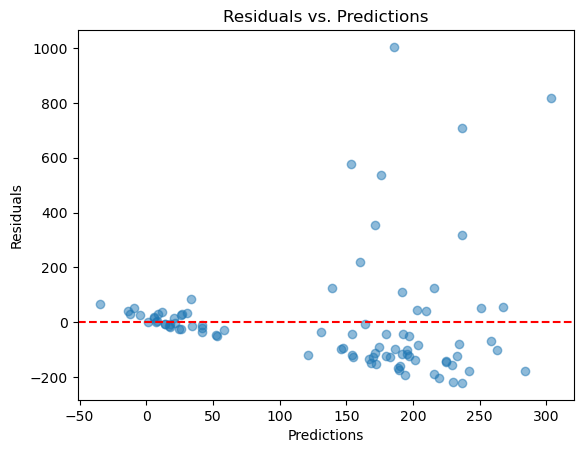

In [45]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)

# Calculate the predictions of the model
predictions = result.fittedvalues

# Plot the scatterplot of residuals and predictions
plt.scatter(predictions, residuals, alpha=0.5)
plt.title('Residuals vs. Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')

plt.axhline(y=0, color='r', linestyle='--')

plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

# Q7d (words): Write your analysis for the Homoscedasticity Test here:
It appears that there is no clear funnel shape or pattern in the plot. However, there is a concentration of data points at the lower end of the predictions, and some spread among residuals at higher prediction values. This may suggest a slight heteroscedasticity, as the variance of residuals seems to increase with the predicted values. There's no obvious pattern indicating non-linearity.

**Q8: Multicollinearity**

In [46]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor # Used to calculate the Variance Inflation Factor

In [47]:
# Calculate VIF
# Create an empty DataFrame to store VIF results
vif_data = pd.DataFrame()
# Assign the names of the features
vif_data['feature'] = X.columns
# Assign the names of the features
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 feature            VIF
0                  const  606830.103995
1  masculine_power_score       1.004842
2         published_year       1.004514
3                  words       1.000330


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

# Q8b (words): Write your analysis for the multicollinearity test here:
Masculine_power_score, published_year, and words all have VIF values close to 1. It strongly suggests that these predictors do not have multicollinearity. This means that each of these predictors provides unique information to the model that is not redundantly explained by the other variables. The extremely high VIF value for the constant term represents numerical issues within the data or model specification. Moreover, the large condition number mentioned alongside the VIF values warns of numerical instability. While the specific predictors seem to have no multicollinearity, the high VIF for the constant and the large condition number suggest that the model's reliability might be affected.

**Q9: Reflection**

# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?
This study combines literary analysis and quantitative modeling, trying to quantify social and cultural phenomena using data science.This interdisciplinary approach is creative.While computational methods provide powerful tools for literary analysis, careful consideration of data and model specifications is required. For example, the model may miss other important variables since it can only explain 16.2% of the variance in kudos. More predictors that may influence kudos, such as genre and fanfiction length, can be included. Sentiment analysis is also helpful to capture the emotional tone of a story. This study assumes a linear relationship between predictors and kudos. If a nonlinear relationship is found, a nonlinear model or transformation may be more appropriate.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.